# UAF GEOS694: Introduction to Computational Geosciences
Bryant Chow; Spring 2026

## Week 2 Code Examples
Focusing on code writing and identifying and fixing things that make code more difficult to read and maintain.  
This notebook contains some examples of bad code and ways that I would fix them based on PEP-8 and prioritizing flow in the code.  
Note that this this is not the only way, hence why I call them "better examples". Just one way to improve things.

---

### 1) Make Manageable Bits

Like in writing, you can have run-on code that makes it difficult to figure out what a specific code block is doing without having to re-read it, or keep multiple unnecessary things in your head at once. 

**Goal: Try to make code visually and functionally mananagable and parsable.**

#### Things to watch out for
- Unclear variable names
- Mixing steps
- Defining variables in multiple places
- Defining variables unclearly
- Unnecessary verbosity

#### Things to notice
- F-string formatters for string formatting (https://docs.python.org/3/reference/lexical_analysis.html#f-strings)
- Python's assert() used for checking (https://docs.python.org/3/reference/simple_stmts.html#grammar-token-python-grammar-assert_stmt)

a is 1
x in steps of 11.11111111111111


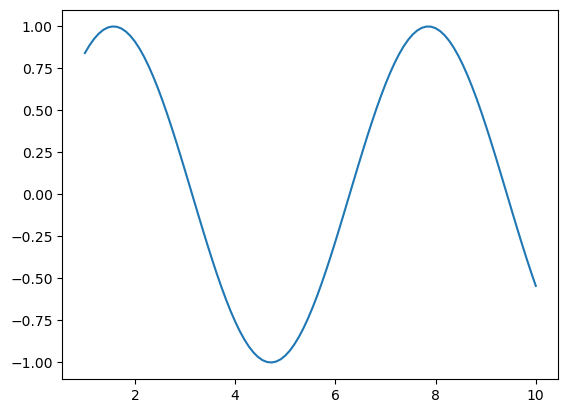

In [11]:
# BAD EXAMPLE 1
a = 1  # start
b = 10  # end
from numpy import *
x = linspace(a, b, 100)
print(f"a is {a}")
y = sin(x)
print("x in steps of",len(x)/(b-a))
if len(x) < 50:
    import sys
    print("x should be longer than 50")
    sys.exit(-1)
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

dx is 11.11


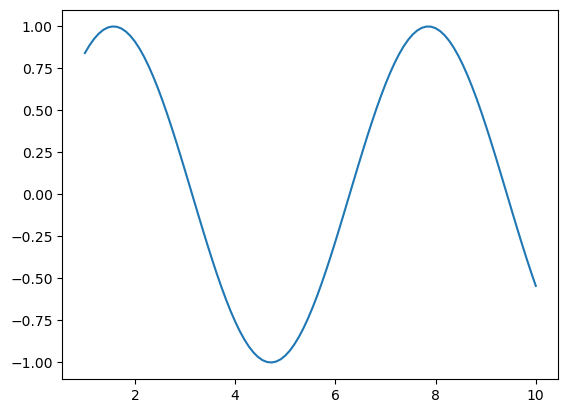

In [76]:
# BETTER EXAMPLE 1
import sys
import matplotlib.pyplot as plt
import numpy as np

start = 1
end = 10
npoints = 100
npoints_check = 50
print(f"dx is {npoints/(end-start):.2f}")

assert(npoints > npoints_check),\
    f"npoints ({npoints}) < check value ({npoints_check})"

x = np.linspace(start, end, npoints)
y = np.sin(x)

plt.plot(x, y)
plt.show()

### 2) Be clear, concise, general

Strive to make your code general from the get-go. This will make it easier to share, use on different systems, or understand in the future. If you find yourself hard coding a lot of things, ask yourself if you can make that more general. You should strive to make things more concise, but do not sacrifice readability for it.

#### Things to watch out for
- Hardcoding
- Scattered requirements
- Unclear variables
- Operations that require thought to understand
- Variables that are very similar (e.g., data & date, time & times)
- Using variables that match standard Python variables, or library, names

#### Things to notice
- When parsing a list, you can use `_` as a throwaway parameter to denote that you do not care about that variable
- When parsing a list, you can use `*_` at the end to throwaway all the remaining parameters
- Manually lining up variables can look nice, but makes it more work to change variable names later
- Breaking path and filename apart makes things even more general transportable
- Variables considered `constants` should be upper-case (e.g., months in a year, speed of light) and at the top
- Consider adding units to variable names to make it ultra-clear


In [77]:
# BAD EXAMPLE 2
import numpy as np

# reads data
Data = np.loadtxt("/Users/chow/Repos/UAFGEOTEACH/GEOS694_CIG/WEEK2/"
                  "phelan_creek_stream_guage_2024-09-07_to_2024-09-14.txt",
                  skiprows=28, dtype=str)
gageHeightFT = []; times = []
for line in Data:
    if line[0] != "USGS":
        continue
    date   = line[2]
    time   = line[3]
    hour   = time[:2]
    minute = time[3:]
    if line[4] == "AKDT":
        hour = int(hour) - 9  # convert to UTC
    else:
        continue
    if date[:4] != "2024":
        continue
    gageHeightFT.append(float(line[-2]))
    times.append(hour * 60 + int(minute))

# prints data
print(times[:3], gageHeightFT[:3])

[-540, -525, -510] [47.94, 47.94, 47.94]


In [55]:
# BETTER EXAMPLE 2
import os
import numpy as np

MINUTES_PER_HOUR = 60

# ================  SET INPUT VARIABLES HERE ========================
path = "/Users/chow/Repos/UAFGEOTEACH/GEOS694_CIG/WEEK2/"
filename = "./phelan_creek_stream_guage_2024-09-07_to_2024-09-14.txt"
year_check = "2024"
agency_check = "USGS"
timezone_check = "AKDT"
shift_hour_to_utc = -9
header_length = 28
# ====================================================================

# IMPORTING DATA
data = np.loadtxt(os.path.join(path, filename), skiprows=header_length, dtype=str)

# GATHERING TIME AND AMPLITUDE DATA FOR SPECIFIC YEAR AND AGENCY
gage_data_ft, time_utc = [], []
for line in data:
    agency, _, date_ymd, time_hs, timezone, gage_height, *_ = line[:]
    year, month, day = date_ymd.split("-")
    hour, minute = time_hs.split(":")

    hour = int(hour)
    minute = int(minute)
    gage_height = float(gage_height)

    if agency != agency_check:
        continue
    if year != year_check:
        continue
    if timezone != timezone_check:
        continue
    else:
        hour += shift_hour_to_utc

    utc_time_in_minutes = (hour * MINUTES_PER_HOUR) + minute

    gage_data_ft.append(gage_height)
    time_utc.append(utc_time_in_minutes)

# Check to ensure that data values match text file
print(time_utc[:3], gage_data_ft[:3])

[-540, -525, -510] [47.94, 47.94, 47.94]


### 3) Try not to repeat yourself

We've all done it, you need to apply a process to multiple things, and the code is already written, what's the harm in copy-pasting and just changing that variable? I already know it works! The harm is that it means more difficult maintenance and potential for error (if you change something and don't catch every instance). Repeated code blocks may obscure the purpose of the code. 

**GOAL: Try to only define things once in your code.**

#### Things to watch out for
- Copy-pasting code blocks with minor modifications

#### Things to notice
- You can pass functions around as objects to be called later
- Dictionaries are nice ways to pass around tags and items together
- Remember to `plt.close()` your figures after showing or saving them, otherwise they hang around in memory

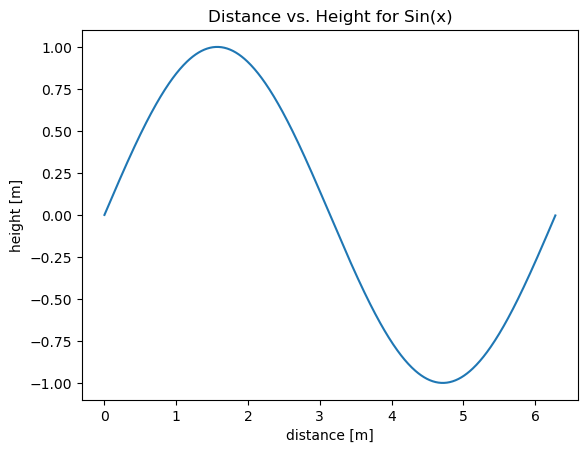

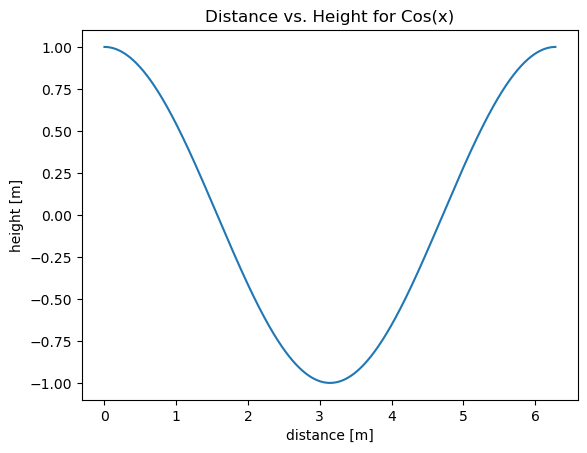

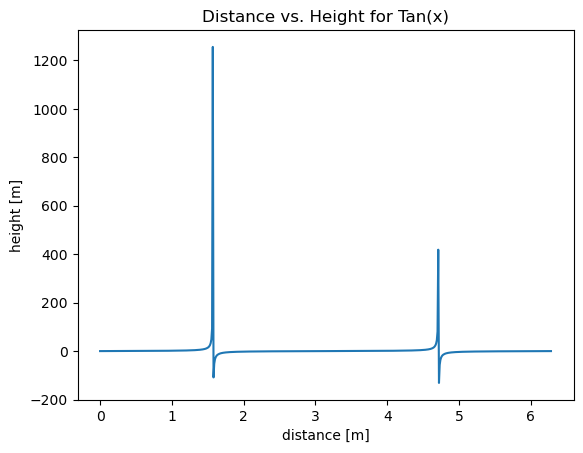

In [60]:
# BAD EXAMPLE 3
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 2*np.pi, .01)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel("distance [m]")
plt.ylabel("height [m]")
plt.title("Distance vs. Height for Sin(x)")
plt.show()

y = np.cos(x)
plt.plot(x, y)
plt.xlabel("distance [m]")
plt.ylabel("height [m]")
plt.title("Distance vs. Height for Cos(x)")
plt.show()

y = np.tan(x)
plt.plot(x, y)
plt.xlabel("distance [m]")
plt.ylabel("height [m]")
plt.title("Distance vs. Height for Tan(x)")
plt.show()

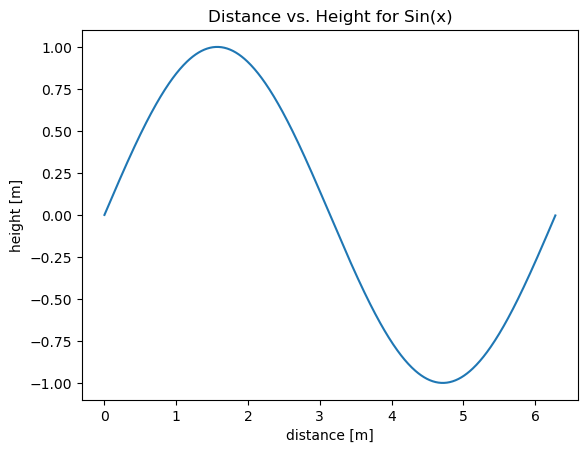

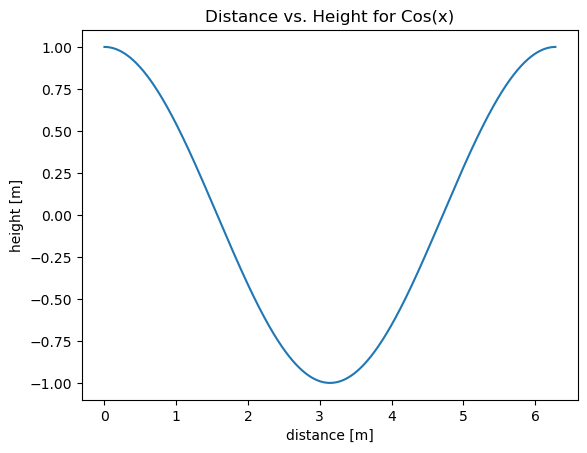

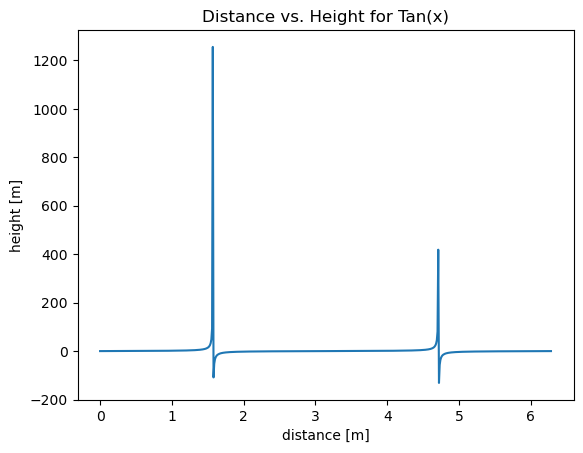

In [81]:
# BETTER EXAMPLE 3 
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 2*np.pi, .01)

functions = [np.sin, np.cos, np.tan]
for f in functions:
    plt.plot(x, f(x))
    
    plt.xlabel("distance [m]")
    plt.ylabel("height [m]")
    plt.title(f"Distance vs. Height for {f.__name__.capitalize()}(x)")
    plt.show()    
    plt.close()

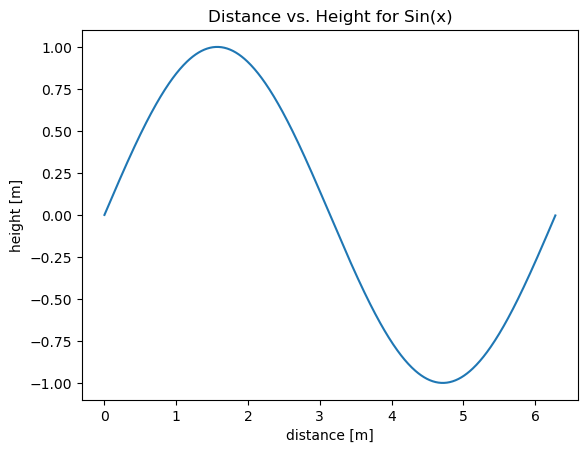

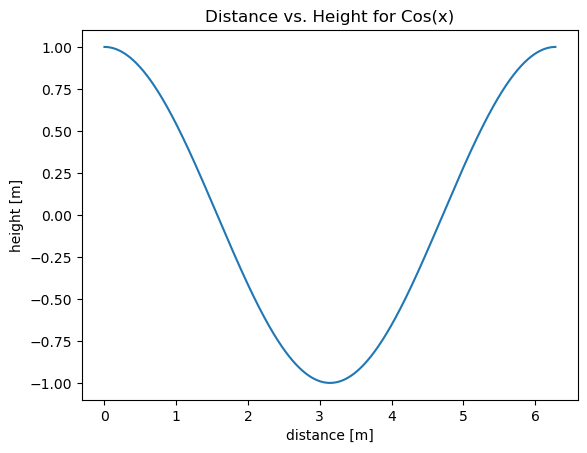

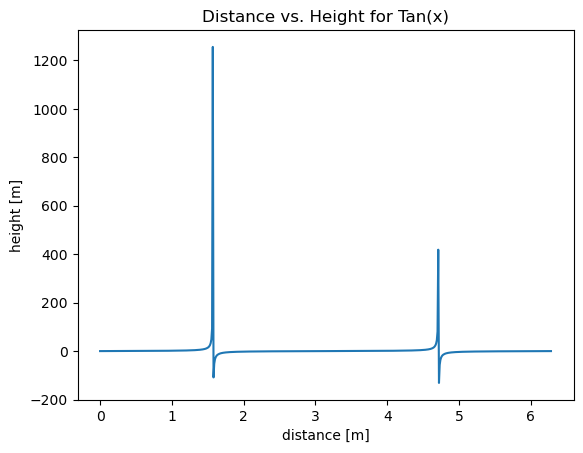

In [85]:
# BETTER EXAMPLE 3 (alternative)
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 2*np.pi, .01)

functions = {"Sin": np.sin, "Cos": np.cos, "Tan": np.tan}
for name, f in functions.items():
    plt.plot(x, f(x))
    
    plt.xlabel("distance [m]")
    plt.ylabel("height [m]")
    plt.title(f"Distance vs. Height for {name}(x)")
    plt.show()    
    plt.close()

### 4) Other things to be careful about

Well known common issues that new programmers sometimes get into without knowing it's bad

#### 4a) Mutable Objects

Mutable, or liable to change, refers to object references versus copies. Because we do not explicitely handle memory management in Python, this point can be lost on new users, and can lead to annoying issues down the road if you are not being careful about it.

In [72]:
# BAD: Mutable Objects
def func(param=[]):
    param.append(1)
    print(param)

func()
func()
func()

[1]
[1, 1]
[1, 1, 1]


In [73]:
# BETTER
def func(param=None):
    if not param:
        param = []
    param.append(1)
    print(param)

func()
func()
func()

[1]
[1]
[1]


#### 4b) Try-Except Blocks
Try-Except blocks allow you to bypass **known** errors. Do not use generic `except` blocks because they may obscure the actual issue. Only use these when you have a specific error you are trying to catch.

List of Built-In Python Exceptions: https://docs.python.org/3/library/exceptions.html

In [69]:
# BAD: Try-Except is great for testing, but be explicit when you are doing it
try:
    import sy  # should be 'sys'
    a = "5"
    print(a + 10)
except:
    print("failed, but I don't know why")    

failed, but I don't know why


In [71]:
# BETTER
try:
    import sys 
    a = "5"
    print(a + 10)
except ImportError:
    print("failed to import")   
except TypeError:
    print("incorrect type")

incorrect type


### 5) Functions

- Functions take inputs and produce outputs.
- Like math y = f(x). In this case f is the function x is input and y is output. 
- A function should be specific, self-contained, and concise. 
- Functions can be used to replace repeating code, to hide complexity. 

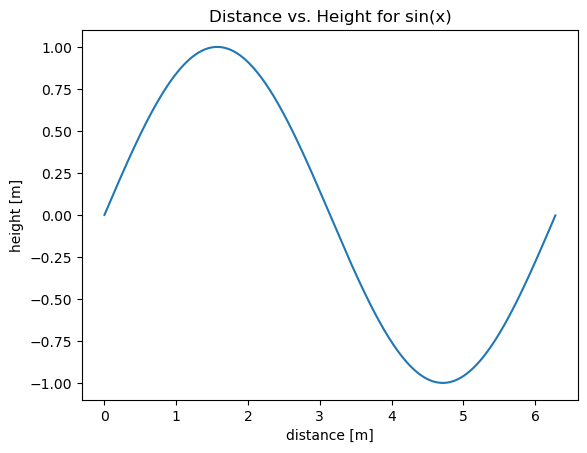

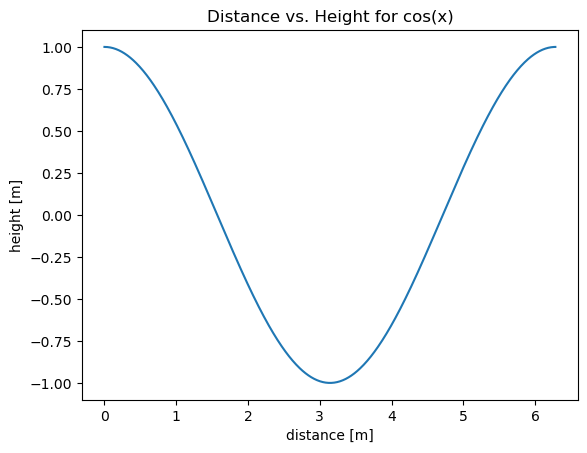

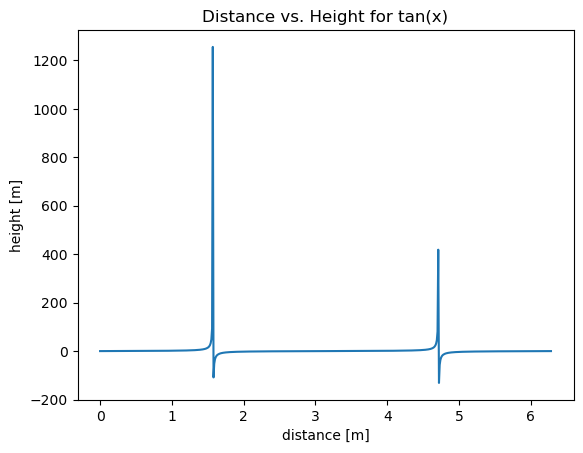

In [74]:
# EXAMPLE 3 WITH A FUNCTION
import matplotlib.pyplot as plt
import numpy as np

def plot_values(x, y, tag="f"):
    """
    Creates a plot with proper labels and title

    :type x: np.array
    :param x: x-axis array
    :type y: np.array
    :param y: y-axis array
    :type tag: str
    :param tag: name of function that will be used in title
    """
    plt.plot(x, y)
    plt.xlabel("distance [m]")
    plt.ylabel("height [m]")
    plt.title(f"Distance vs. Height for {tag}(x)")
    plt.show()


x = np.arange(0, 2*np.pi, .01)
plot_values(x, np.sin(x), "sin")
plot_values(x, np.cos(x), "cos")
plot_values(x, np.tan(x), "tan")

Resist the urge to just take sections of your code and turn each one into functions, where you end up feeding outputs of one function into the inputs of another. You should ask yourself if your functions can be more concise.
